# # Import libraries

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn import datasets
import numpy as np
import matplotlib.pyplot as plt
import sklearn


from sklearn.model_selection import train_test_split

In [2]:
mnist = datasets.load_digits()


(trainData, testData, trainLabels, testLabels) = train_test_split(np.array(mnist.data),
	mnist.target, test_size=0.25, random_state=42)


(trainData, valData, trainLabels, valLabels) = train_test_split(trainData, trainLabels,
	test_size=0.1, random_state=84)


print("training data points: {}".format(len(trainLabels)))
print("validation data points: {}".format(len(valLabels)))
print("testing data points: {}".format(len(testLabels)))



training data points: 1212
validation data points: 135
testing data points: 450


In [3]:
kVals = range(1, 30, 2)
accuracies = []


for k in range(1, 30, 2):
	model = KNeighborsClassifier(n_neighbors=k)
	model.fit(trainData, trainLabels)

	
	score = model.score(valData, valLabels)
	print("k=%d, accuracy=%.2f%%" % (k, score * 100))
	accuracies.append(score)


i = int(np.argmax(accuracies))
print("k=%d achieved highest accuracy of %.2f%% on validation data" % (kVals[i],
	accuracies[i] * 100))

k=1, accuracy=99.26%
k=3, accuracy=99.26%
k=5, accuracy=99.26%
k=7, accuracy=99.26%
k=9, accuracy=99.26%
k=11, accuracy=99.26%
k=13, accuracy=99.26%
k=15, accuracy=99.26%
k=17, accuracy=98.52%
k=19, accuracy=98.52%
k=21, accuracy=97.78%
k=23, accuracy=97.04%
k=25, accuracy=97.78%
k=27, accuracy=97.04%
k=29, accuracy=97.04%
k=1 achieved highest accuracy of 99.26% on validation data


In [4]:
model = KNeighborsClassifier(n_neighbors=kVals[i])
model.fit(trainData, trainLabels)
predictions = model.predict(testData)


print("EVALUATION ON TESTING DATA")
print(classification_report(testLabels, predictions))

EVALUATION ON TESTING DATA
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        43
           1       0.95      1.00      0.97        37
           2       1.00      1.00      1.00        38
           3       0.98      0.98      0.98        46
           4       0.98      0.98      0.98        55
           5       0.98      1.00      0.99        59
           6       1.00      1.00      1.00        45
           7       1.00      0.98      0.99        41
           8       0.97      0.95      0.96        38
           9       0.96      0.94      0.95        48

   micro avg       0.98      0.98      0.98       450
   macro avg       0.98      0.98      0.98       450
weighted avg       0.98      0.98      0.98       450



I think that digit is: 2


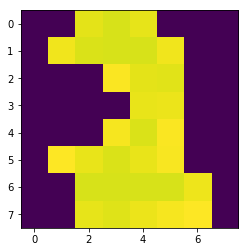

I think that digit is: 0


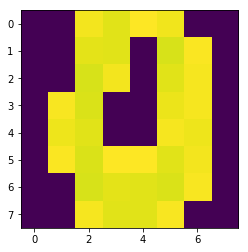

I think that digit is: 9


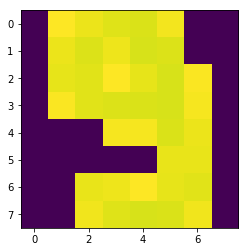

I think that digit is: 6


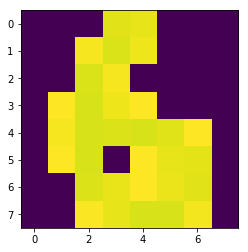

I think that digit is: 6


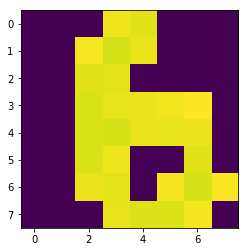

In [5]:
def gen_image(arr):
    two_d = (np.reshape(arr, (8, 8)) * 255).astype(np.uint8)
    plt.imshow(two_d, interpolation='nearest')
    return plt	


for i in list(map(int, np.random.randint(0, high=len(testLabels), size=(5,)))):
	
	image = testData[i]
	prediction = model.predict(image.reshape(1, -1))[0]

	
	print("I think that digit is: {}".format(prediction))
	gen_image(testData[i]).show()